https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
http://cxhernandez.com/tutorials/dataviz/2014/11/19/jointplot-d3.html

In [1]:
from astropy.io import fits
from astropy.io import ascii
from matplotlib import pyplot as plt
from astropy import constants as c
from astropy import units as u
import numpy as np


two columns
- matched
- not matched
- use stellar masses as calculated from a100






# Load Data#

In [6]:
a100nsa = fits.getdata('tables/a100_NSAmatched-mco190730.fits')
a100sdss = ascii.read('tables/a100-SDSS-catalog-mco190725.csv')
a100s4g = fits.getdata('tables/a100-s4g_overlapregion-mco.fits')

## Figure 1: ##
- table = a100-SDSS-catalog-mco190725.csv
- _corrected values are corrected according to our correction scheme

- abs mag on x axis
- g-i color

**LEFT**
- uncorrected for internal extinction
- has galactic extinction
- ABSMAGI, gmi_noint - no internal correction

**CENTER**
- Shao
- I_Shao, gmi_Shao

**RIGHT**
- our correction
- I_corrected, gmi_corrected

cut on having low uncertainty in magnitude. photFlag_gi (formal errors all less than 0.05, does ok job for taking outliers away)


In [97]:
a100sdss['expAB_g']

0.8112158
0.2314145
0.6308594
0.4891899
0.4158541
0.3184742
0.97304
0.5499
0.8264326
0.8015992
0.5888596


In [130]:
def colormag(mag, color, ab, ylabel):
    #plt.plot(mag, color,  'k.', alpha=.05)
    limits = [-23.5, -14.5, -.5, 1.9]
    flag = ab > 0.8
    #plt.hexbin(mag[flag],color[flag], extent=limits, cmap='gray_r', vmin=0,vmax=45)
    plt.plot(mag[flag],color[flag],'k.',alpha=.2, markersize=3, label='$B/A > 0.8$')
    flag = ab < 0.3
    #plt.hexbin(mag[flag],color[flag], extent=limits, cmap='Purples_r', vmin=0,vmax=45)
    plt.plot(mag[flag],color[flag],'c.',alpha=.2,markersize=3,label='$B/A < 0.3$')
    plt.axis(limits)
    plt.xticks(np.arange(-23,-14,2))
    plt.title(ylabel, fontsize=14)

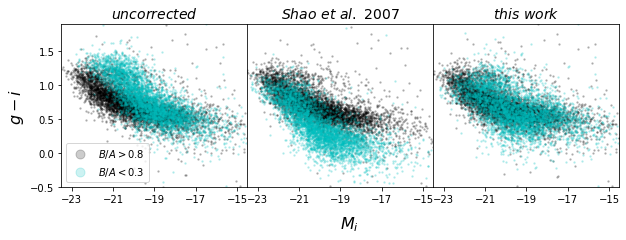

In [135]:

plt.figure(figsize=(10,3))
plt.subplots_adjust(wspace=.0)
# 
plt.subplot(1,3,1)
photflag = a100sdss['photFlag_gi'] == 1
colormag(a100sdss['absMag_i'][photflag], a100sdss['gmi_no_int'][photflag], 
         a100sdss['expAB_g'][photflag],'${uncorrected}$')
plt.ylabel('$g-i$',fontsize=16)
plt.legend(loc='lower left',markerscale=6)
#plt.gca()
plt.subplot(1,3,2)
photflag = a100sdss['photFlag_gi'] == 1
colormag(a100sdss['I_Shao'][photflag], a100sdss['gmi_Shao'][photflag],
         a100sdss['expAB_g'][photflag],'${Shao\ et\ al. \ 2007}$')
plt.yticks(())
ax = plt.gca()
plt.text(.5,-.25,'$M_i$',fontsize=16, transform = ax.transAxes)

plt.subplot(1,3,3)
photflag = a100sdss['photFlag_gi'] == 1
colormag(a100sdss['I_corrected'][photflag], a100sdss['gmi_corrected'][photflag],
         a100sdss['expAB_g'][photflag],'${this \ work}$')
plt.yticks(())
plt.savefig('Figure1.pdf')


## Figure 2: A100 vs NSA##

- data file = a100-nsa_overlapregion-mco.fits


**LEFT** 
- 2 panels
- left - everything is calculated based on NSA parameters
- red - matches
- blue - everything in NSA
- taylor stellar mass, but from magnitudes in NSA; could use stellar mass from K-correct
- compare taylor stellar mass from NSA magnitudes vs stellar mass from K-correct
- also compare color-mass diagram to see if it looks much different
- LogMstarTaylor_2 - based on NSA
- gmiShao is ok for y axis
- actually, calculate extinction like we do in the paper

- for log(a/b), use SERSIC_BA (compare with PETRO_BA90, we are using PETRO to measure the mag flux)
gamma_g = -0.35*Mg - 5.95, Mg < -17
extinction_g = gamma_g* log10(1./sersic_BA) 
- mag_corr = mag + extinction_g - NSA_EXTINCTION[3]

**RIGHT**
- red is galaxies that matched
- blue - a100 that didn't match to NSA
- using parameters from a100 catalog
- stellar mass taylor
- g-i color, corrected - gmi corrected - color to use on y axis - based on A100 values
- LogMstarTaylor_1
- use photFlag_gi = 1


- matchflag = 3, matched in position, and then with a cut on velocity difference
- matchflag = 4, matched in position, but large velocity offset (ignore this set for now)
- matchflag = 1, in a100 only
- matchflag = 2, in other catalog only

In [133]:
def colormass(x1,y1,x2,y2,name1,name2, figname):
    fig = plt.figure(figsize=(8,8))
    nrow = 4
    ncol = 4
    ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
    #plt.plot(xvar2,yvar2,'b.',alpha=.3, label='NSA')
    #plt.plot(xvar,yvar,'k.',alpha=.1,label='AGC', zorder=2)


    #t1 = plt.hist2d(xvar,yvar,bins=100,cmap='gray_r')
    #H, xbins,ybins = np.histogram2d(xvar,yvar,bins=20)
    #extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
    #plt.contour(np.log10(H.T+1),  10, extent = extent, zorder=1,colors='k')
    #plt.hexbin(xvar2,yvar2,bins='log',cmap='Blues', gridsize=100)
    plt.hexbin(x1,y1,bins='log',cmap='gray_r', gridsize=75,label=name1)
    H, xbins,ybins = np.histogram2d(x2,y2,bins=40)
    extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
    plt.contour((H.T), 5, extent = extent, zorder=1,colors='c', label=name2)

    #sns.kdeplot(agc['LogMstarTaylor'][keepagc],agc['gmi_corrected'][keepagc])#,bins='log',gridsize=200,cmap='blue_r')
    #plt.colorbar()
    #plt.legend()
    plt.axis([7.9,11.6,-.05,2])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('$\log_{10}(M_\star/M_\odot) $',fontsize=20)
    plt.ylabel('$(g-i)_{corrected} $',fontsize=20)
    plt.axis([7.9,11.6,-.05,2])
    ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1, yticks=[])
    t = plt.hist(x1, normed=True, bins=100,color='k',histtype='step',lw=1.5)
    t = plt.hist(x2, normed=True, bins=100,color='c',histtype='step',lw=1.5)
    ax2.xaxis.tick_top()
    ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1, xticks=[])
    t=plt.hist(y1, normed=True, orientation='horizontal',bins=100,color='k',histtype='step',lw=1.5)
    t=plt.hist(y2, normed=True, orientation='horizontal',bins=100,color='c',histtype='step',lw=1.5)
    plt.yticks(rotation='horizontal')
    ax3.yaxis.tick_right()
    plt.savefig(figname)
    
    

In [84]:
photflag = a100sdss['photFlag_gi'] == 1

## Figure 3: A100 vs S4G##

-datafile = a100-s4g_overlapregion-mco.fits

## Figure 4: A100 vs GSWL##

# Comparing Martha and Mary's Catalogs #

* Martha's A100 catalog has 31503 sources.
* Mary's catalog has 31502 sources.
* Mary's catalog has one fewer source.

Going to use Mary's catalog because it has the AGC columns appended already.

In [142]:
### OLD STUFF FROM WHEN I WAS MAKING MY OWN CUTS
# just overlap regions
'a100-nsa_overlapregion-mco.fits'
'a100-s4g_overlapregion-mco.fits'
agc_path = '/Users/rfinn/github/APPSS/tables/'


#a100
agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
#agc_name = agc_path+'a100-SDSS-catalog-mco190725.fits'
mh_agc = ascii.read(agc_name)

#a100
#agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
agc_name = agc_path+'a100-SDSS-catalog-mco190725.fits'
agc = fits.getdata(agc_name,1)

# nsa
nsa_path = '/Users/rfinn/research/NSA/'
nsa_name = nsa_path+'nsa_v0_1_2.fits'
nsa = fits.getdata(nsa_name)
nsa_gi = nsa['ABSMAG'][:,3] - nsa['ABSMAG'][:,5]
h=.7
nsa_logstellarmassTaylor=1.15+0.70*(nsa['ABSMAG'][:,3]-nsa['ABSMAG'][:,5]) -0.4*(nsa['ABSMAG'][:,5]+ 5.*np.log10(h))

In [17]:
print(len(mh_agc),len(agc))

31503 31502


In [18]:
nsa.columns

ColDefs(
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ISDSS'; format = 'J'
    name = 'INED'; format = 'J'
    name = 'ISIXDF'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'IZCAT'; format = 'J'
    name = 'ITWODF'; format = 'J'
    name = 'MAG'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'ZSRC'; format = '7A'
    name = 'SIZE'; format = 'E'
    name = 'RUN'; format = 'I'
    name = 'CAMCOL'; format = 'B'
    name = 'FIELD'; format = 'I'
    name = 'RERUN'; format = '3A'
    name = 'XPOS'; format = 'E'
    name = 'YPOS'; format = 'E'
    name = 'ZLG'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'ZDIST_ERR'; format = 'E'
    name = 'NSAID'; format = 'J'
    name = 'NMGY'; format = '7E'
    name = 'NMGY_IVAR'; format = '7E'
    name = 'OK'; format = 'I'
    name = 'RNMGY'; format = '7E'
    name = 'ABSMAG'; format = '7E'
    name = 'AMIVAR'; format = 

In [204]:
# define flag for keeping both samples
ramin = 120.
ramax = 240.
decmin = 0.
decmax = 36.
zmax = 0.05
ra = agc['ra']
dec = agc['dec']
redshift = agc['Vhelio']/c.c.value
keepagc = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax) & (redshift < .05) & (agc['modelMagErr_g'] < .01) & (agc['modelMagErr_i'] < .01)

# repeat for NSA
ra = nsa['RA']
dec = nsa['DEC']
redshift = nsa['ZDIST']

nsamagflag = (2.5*np.log10(np.sqrt(nsa['NMGY_IVAR'][:,3])) < .1) & (2.5*np.log10(np.sqrt(nsa['NMGY_IVAR'][:,5])) < .1)
nsamagflag = (nsa['NMGY'][:,3]/nsa['NMGY_IVAR'][:,3] > 20.) & (nsa['NMGY'][:,5]/nsa['NMGY_IVAR'][:,5] > 20.)
keepnsa = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax) & (redshift < .05) & nsamagflag & (nsa_gi > -1) & (nsa_gi < 2.5)



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in 

### Plot g-i corrected vs stellar mass ###

In [75]:
sum(keepagc)

19101

In [ ]:
# from my original plot
# central panel
x1 = agc['LogMstarTaylor'][keepagc]
y1 = agc['gmi_corrected'][keepagc]
x2 = nsa_logstellarmassTaylor[keepnsa]
y2 = nsa_gi[keepnsa]
colormass(x1,y1,x2,y2,'colormass-myversion.png')

Text(336.971,0.5,'$(g-i)_{corrected} $')

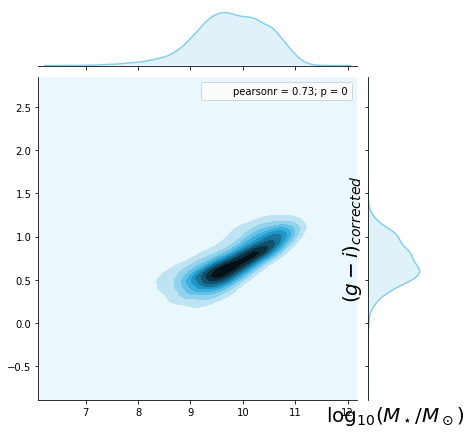

In [217]:
sns.jointplot(x=agc['LogMstarTaylor'][keepagc], y=agc['gmi_corrected'][keepagc], kind='kde', color="skyblue")
plt.xlabel('$\log_{10}(M_\star/M_\odot) $',fontsize=20)
plt.ylabel('$(g-i)_{corrected} $',fontsize=20)